In [ ]:
#libraries import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')

In [ ]:
#raw dataset
data.head()

,Transaction ID,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1,57.877857,0.311140,1.945940,1,1,0,No,0
1,2,10.829943,0.175592,1.294219,1,0,0,No,0
2,3,5.091079,0.805153,0.427715,1,0,0,Yes,0
3,4,2.247564,5.600044,NaN,1,1,0,Yes,0
4,5,44.190936,0.566486,NaN,1,1,0,Yes,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Transaction ID                  1000000 non-null  int64  
 1   distance_from_home              1000000 non-null  float64
 2   distance_from_last_transaction  1000000 non-null  float64
 3   ratio_to_median_purchase_price  999800 non-null   float64
 4   repeat_retailer                 1000000 non-null  int64  
 5   used_chip                       1000000 non-null  int64  
 6   used_pin_number                 1000000 non-null  int64  
 7   online_order                    1000000 non-null  object 
 8   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 68.7+ MB


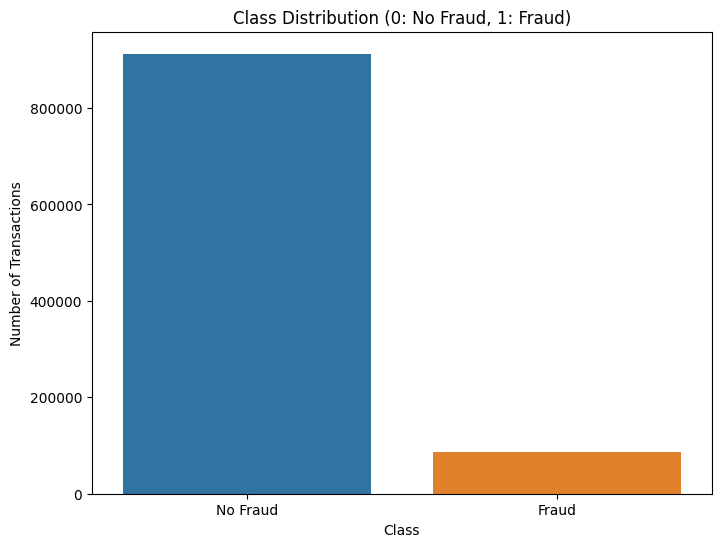

In [ ]:
#class distribution of target column

plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=data)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.show()

<ipython-input-7-6fa233299a84>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


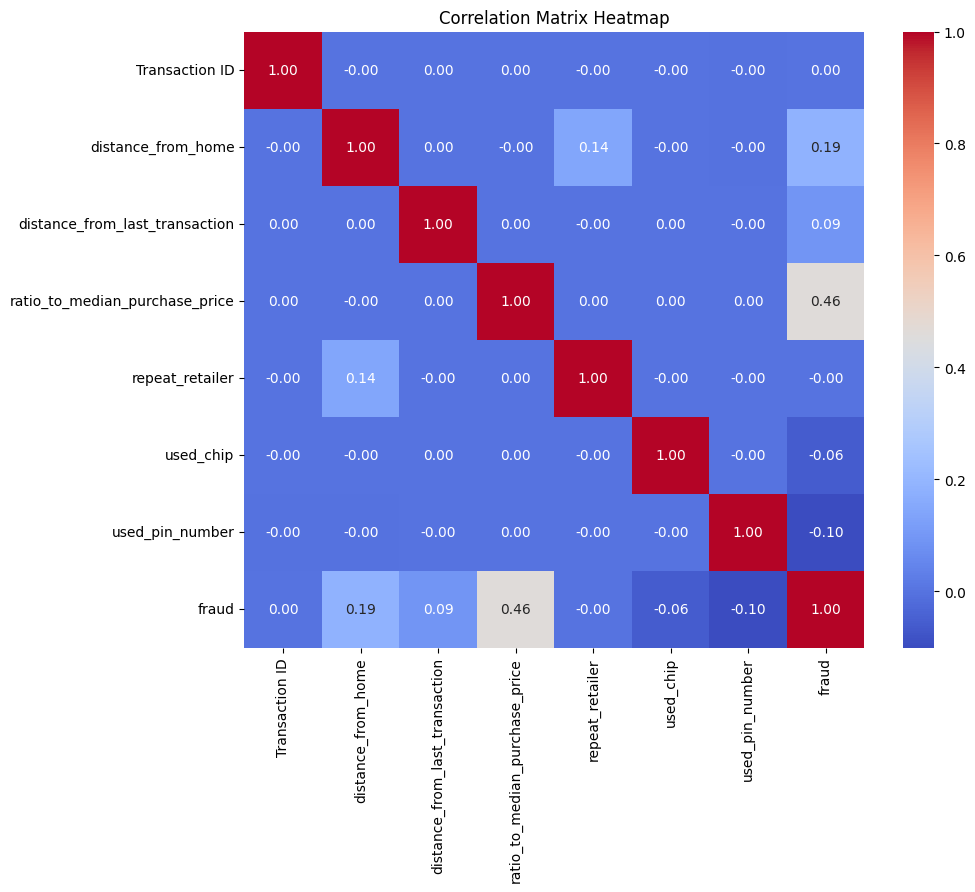

In [ ]:
#producing heatmap to view correlation using seaborn

# Calculate correlation matrix
corr_matrix = data.corr()

# matplotlib figure
plt.figure(figsize=(10, 8))
# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
#count of null values in each column

data.isnull().sum()

Transaction ID                      0
distance_from_home                  0
distance_from_last_transaction      0
ratio_to_median_purchase_price    200
repeat_retailer                     0
used_chip                           0
used_pin_number                     0
online_order                        0
fraud                               0
dtype: int64

In [ ]:
#removing null value

data1 = data.dropna(subset=['ratio_to_median_purchase_price'])
data1 = data1.reset_index(drop=True)

print("Shape before removing null values: ", data.shape)
print("Shape after removing null values: ", data1.shape)
data1.head()

Shape before removing null values:  (1000000, 9)
Shape after removing null values:  (999800, 9)


,Transaction ID,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1,57.877857,0.311140,1.945940,1,1,0,No,0
1,2,10.829943,0.175592,1.294219,1,0,0,No,0
2,3,5.091079,0.805153,0.427715,1,0,0,Yes,0
3,7,3.724019,0.956838,0.278465,1,0,0,Yes,0
4,8,4.848247,0.320735,1.273050,1,0,1,No,0


In [ ]:
#feature selection

data1 = data1.drop(['Transaction ID'], axis = 1)
data1.shape

(999800, 8)

In [ ]:
data1.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
#data types to look for categorical values
features = data1.dtypes
features

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                       object
fraud                               int64
dtype: object

In [ ]:
#before encoding
data1['online_order'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#ENCODING

from sklearn.preprocessing import LabelEncoder

# the LabelEncoder object
enc = LabelEncoder()

data1['online_order'] = enc.fit_transform(data1['online_order'])

#after encoding
data1['online_order'].unique()

array([0, 1])

In [ ]:
data1.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,3.724019,0.956838,0.278465,1,0,0,1,0
4,4.848247,0.320735,1.273050,1,0,1,0,0


In [ ]:
#SCALING using standard scale

from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and 'fraud' is the target column
features = data1.drop('fraud', axis=1)
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Now you can use .head()
scaled_data.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.477825,-0.182843,0.043443,0.366569,1.361576,-0.334456,-1.364426
1,-0.241609,-0.188088,-0.189333,0.366569,-0.734443,-0.334456,-1.364426
2,-0.329365,-0.163729,-0.498825,0.366569,-0.734443,-0.334456,0.732909
3,-0.350269,-0.157860,-0.552133,0.366569,-0.734443,-0.334456,0.732909
4,-0.333078,-0.182472,-0.196894,0.366569,-0.734443,2.989925,-1.364426


In [ ]:
# stratidied splitting
from sklearn.model_selection import train_test_split
X = scaled_data
y = data1['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0, stratify = y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((699860, 7), (299940, 7), (699860,), (299940,))

In [ ]:
#libraries for machine learning models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#KNN

knn = KNeighborsClassifier(n_neighbors=3)

#Train the model
knn.fit(X_train, y_train)

#prediction
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

print("The Accuracy of KNN is: {:.2f}".format(np.mean(y_pred == y_test)))

Test set predictions:
 [0 0 0 ... 1 0 1]
The Accuracy of KNN is: 1.00


In [ ]:
#Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train) #Training the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

print( accuracy_score(y_test, predictions))

[0 0 0 ... 1 0 1]
0.9589284523571381


In [ ]:
#SVM

svm_model = LinearSVC(dual=False)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(svm_pred)
print( accuracy_score(y_test, svm_pred))

[0 0 0 ... 1 0 1]
0.942748549709942


In [ ]:
# Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions_output = gnb.predict(X_test)
print(predictions_output)
print( accuracy_score(y_test, predictions_output))

[0 0 0 ... 1 0 1]
0.9511702340468093


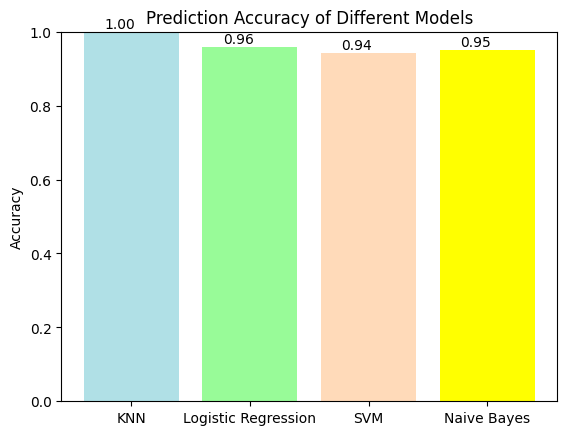

In [ ]:
#prediction accuracy bar chart

# Bar chart
models = ['KNN', 'Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, predictions),
              accuracy_score(y_test, svm_pred), accuracy_score(y_test, predictions_output)]

# Create the bar chart
bars = plt.bar(models, accuracies, color=['powderblue', 'palegreen', 'peachpuff', 'yellow'])

# Add accuracy on top
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center')

plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')
plt.ylim(0, 1)
plt.show()


In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
mat_knn=confusion_matrix(y_pred, y_test)
print("confusion matrix of KNN:")
print(mat_knn)
print("#################")
mat_log=confusion_matrix(predictions, y_test)
print("confusion matrix of logistic regression:")
print(mat_log)
print("#################")
mat_SVM=confusion_matrix(svm_pred, y_test)
print("confusion matrix of SVM:")
print(mat_SVM)
print("#################")
mat_NB=confusion_matrix(predictions_output, y_test)
print("confusion matrix of naive bayes")
print(mat_NB)
print("#################")

confusion matrix of KNN:
[[273584    241]
 [   135  25980]]
#################
confusion matrix of logistic regression:
[[271759  10359]
 [  1960  15862]]
#################
confusion matrix of SVM:
[[272542  15995]
 [  1177  10226]]
#################
confusion matrix of naive bayes
[[269553  10480]
 [  4166  15741]]
#################


In [ ]:
#precision and recall

from sklearn.metrics import precision_score, recall_score
# KNN
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)

# Logistic Regression
lg_precision = precision_score(y_test, predictions)
lg_recall = recall_score(y_test, predictions)

# SVM
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

# Naive Bayes
nb_precision = precision_score(y_test, predictions_output)
nb_recall = recall_score(y_test, predictions_output)

print(f"KNN Precision: {knn_precision:.2f}, Recall: {knn_recall:.2f}")
print(f"Logistic Regression Precision: {lg_precision:.2f}, Recall: {lg_recall:.2f}")
print(f"SVM Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}")
print(f"Naive Bayes Precision: {nb_precision:.2f}, Recall: {nb_recall:.2f}")

KNN Precision: 0.99, Recall: 0.99
Logistic Regression Precision: 0.89, Recall: 0.60
SVM Precision: 0.90, Recall: 0.39
Naive Bayes Precision: 0.79, Recall: 0.60


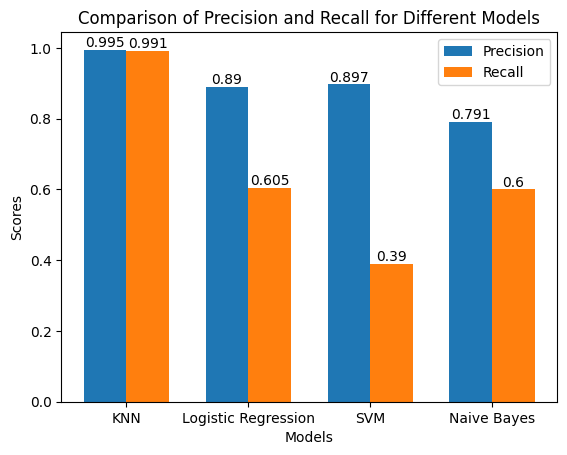

In [ ]:
#precision and recall comparison graph

# Precision and recall values for the three models
models = ['KNN', 'Logistic Regression', 'SVM','Naive Bayes']
precision_values = [knn_precision, lg_precision, svm_precision,  nb_precision]
recall_values = [knn_recall, lg_recall, svm_recall, nb_recall]

# Plotting the bar chart
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, precision_values, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall_values, bar_width, label='Recall')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision and Recall for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Adding values on top of the bars
def add_values_on_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

add_values_on_bars(bar1)
add_values_on_bars(bar2)

# Display the chart
plt.show()
